In [1]:
import pickle, math, time, random, datetime
from datetime import date, timedelta, datetime
from time import time

# Data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing
from pandas import DataFrame
from pandas_profiling import ProfileReport
pd.set_option('max_columns', None)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Import statements required for Plotly (for interactive plotting)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# Preprocessing
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

# machine learning
from sklearn import model_selection, tree, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import ShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import xgboost
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('EmpAttrition.csv')
data

Attrition  Age  Gender MaritalStatus  DistanceFromHome  \
0          Yes   41  Female        Single                 1   
1           No   49    Male       Married                 8   
2          Yes   37    Male        Single                 2   
3           No   33  Female       Married                 3   
4           No   27    Male       Married                 2   
...        ...  ...     ...           ...               ...   
1465        No   36    Male       Married                23   
1466        No   39    Male       Married                 6   
1467        No   27    Male       Married                 4   
1468        No   49    Male       Married                 2   
1469        No   34    Male       Married                 8   

      TotalWorkingYears  NumCompaniesWorked  MonthlyIncome  \
0                     8                   8           5993   
1                    10                   1           5130   
2                     7                   6           2090   
3                     8                   1           2909   
4                     6                   9           3468   
...                 ...                 ...            ...   
1465                 17                   4           2571   
1466                  9                   4           9991   
1467                  6                   1           6142   
1468                 17                   2           5390   
1469                  6                   2           4404   

                        JobRole  YearsAtCompany  YearsWithCurrManager  \
0               Sales Executive               6                     5   
1            Research Scientist              10                     7   
2         Laboratory Technician               0                     0   
3            Research Scientist               8                     0   
4         Laboratory Technician               2                     2   
...                         ...             ...                   ...   
1465      Laboratory Technician               5                     3   
1466  Healthcare Representative               7                     7   
1467     Manufacturing Director               6                     3   
1468            Sales Executive               9                     8   
1469      Laboratory Technician               4                     2   

      YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
0                      4                        0                4   
1                      7                        1                2   
2                      0                        0                3   
3                      7                        3                3   
4                      2                        2                2   
...                  ...                      ...              ...   
1465                   2                        0                4   
1466                   7                        1                1   
1467                   2                        0                2   
1468                   6                        0                2   
1469                   3                        1                3   

      EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
0                           2                         1                1  
1                           3                         4                3  
2                           4                         2                3  
3                           4                         3                3  
4                           1                         4                3  
...                       ...                       ...              ...  
1465                        3                         3                3  
1466                        4                         1                3  
1467                        2                         2                3  
1468                        4      

In [3]:
data.shape

(1470, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   TotalWorkingYears         1470 non-null   int64 
 6   NumCompaniesWorked        1470 non-null   int64 
 7   MonthlyIncome             1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   YearsAtCompany            1470 non-null   int64 
 10  YearsWithCurrManager      1470 non-null   int64 
 11  YearsInCurrentRole        1470 non-null   int64 
 12  YearsSinceLastPromotion   1470 non-null   int64 
 13  JobSatisfaction           1470 non-null   int64 
 14  EnvironmentSatisfaction 

In [5]:
# Find any column with null value
data.isnull().sum()

Attrition                   0
Age                         0
Gender                      0
MaritalStatus               0
DistanceFromHome            0
TotalWorkingYears           0
NumCompaniesWorked          0
MonthlyIncome               0
JobRole                     0
YearsAtCompany              0
YearsWithCurrManager        0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
JobSatisfaction             0
EnvironmentSatisfaction     0
RelationshipSatisfaction    0
WorkLifeBalance             0
dtype: int64

In [6]:
data.describe()

Age  DistanceFromHome  TotalWorkingYears  NumCompaniesWorked  \
count  1470.000000       1470.000000        1470.000000         1470.000000   
mean     36.923810          9.192517          11.279592            2.693197   
std       9.135373          8.106864           7.780782            2.498009   
min      18.000000          1.000000           0.000000            0.000000   
25%      30.000000          2.000000           6.000000            1.000000   
50%      36.000000          7.000000          10.000000            2.000000   
75%      43.000000         14.000000          15.000000            4.000000   
max      60.000000         29.000000          40.000000            9.000000   

       MonthlyIncome  YearsAtCompany  YearsWithCurrManager  \
count    1470.000000     1470.000000           1470.000000   
mean     6502.931293        7.008163              4.123129   
std      4707.956783        6.126525              3.568136   
min      1009.000000        0.000000              0.000000   
25%      2911.000000        3.000000              2.000000   
50%      4919.000000        5.000000              3.000000   
75%      8379.000000        9.000000              7.000000   
max     19999.000000       40.000000             17.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
count         1470.000000              1470.000000      1470.000000   
mean             4.229252                 2.187755         2.728571   
std              3.623137                 3.222430         1.102846   
min              0.000000                 0.000000         1.000000   
25%              2.000000                 0.000000         2.000000   
50%              3.000000                 1.000000         3.000000   
75%              7.000000                 3.000000         4.000000   
max             18.000000                15.000000         4.000000   

       EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
count              1470.000000               1470.000000      1470.000000  
mean                  2.721769                  2.712245         2.761224  
std                   1.093082                  1.081209         0.706476  
min                   1.000000                  1.000000         1.000000  
25%                   2.000000                  2.000000         2.000000  
50%                   3.000000                  3.000000         3.000000  
75%                   4.000000                  4.000000         3.000000  
max                   4.000000                  4.000000         4.000000

In [7]:
data.corr()

Age  DistanceFromHome  TotalWorkingYears  \
Age                       1.000000         -0.001686           0.680381   
DistanceFromHome         -0.001686          1.000000           0.004628   
TotalWorkingYears         0.680381          0.004628           1.000000   
NumCompaniesWorked        0.299635         -0.029251           0.237639   
MonthlyIncome             0.497855         -0.017014           0.772893   
YearsAtCompany            0.311309          0.009508           0.628133   
YearsWithCurrManager      0.202089          0.014406           0.459188   
YearsInCurrentRole        0.212901          0.018845           0.460365   
YearsSinceLastPromotion   0.216513          0.010029           0.404858   
JobSatisfaction          -0.004892         -0.003669          -0.020185   
EnvironmentSatisfaction   0.010146         -0.016075          -0.002693   
RelationshipSatisfaction  0.053535          0.006557           0.024054   
WorkLifeBalance          -0.021490         -0.026556           0.001008   

                          NumCompaniesWorked  MonthlyIncome  YearsAtCompany  \
Age                                 0.299635       0.497855        0.311309   
DistanceFromHome                   -0.029251      -0.017014        0.009508   
TotalWorkingYears                   0.237639       0.772893        0.628133   
NumCompaniesWorked                  1.000000       0.149515       -0.118421   
MonthlyIncome                       0.149515       1.000000        0.514285   
YearsAtCompany                     -0.118421       0.514285        1.000000   
YearsWithCurrManager               -0.110319       0.344079        0.769212   
YearsInCurrentRole                 -0.090754       0.363818        0.758754   
YearsSinceLastPromotion            -0.036814       0.344978        0.618409   
JobSatisfaction                    -0.055699      -0.007157       -0.003803   
EnvironmentSatisfaction             0.012594      -0.006259        0.001458   
RelationshipSatisfaction            0.052733       0.025873        0.019367   
WorkLifeBalance                    -0.008366       0.030683        0.012089   

                          YearsWithCurrManager  YearsInCurrentRole  \
Age                                   0.202089            0.212901   
DistanceFromHome                      0.014406            0.018845   
TotalWorkingYears                     0.459188            0.460365   
NumCompaniesWorked                   -0.110319           -0.090754   
MonthlyIncome                         0.344079            0.363818   
YearsAtCompany                        0.769212            0.758754   
YearsWithCurrManager                  1.000000            0.714365   
YearsInCurrentRole                    0.714365            1.000000   
YearsSinceLastPromotion               0.510224            0.548056   
JobSatisfaction                      -0.027656           -0.002305   
EnvironmentSatisfaction              -0.004999            0.018007   
RelationshipSatisfaction             -0.000867           -0.015123   
WorkLifeBalance                       0.002759            0.049856   

                          YearsSinceLastPromotion  JobSatisfaction  \
Age                                      0.216513        -0.004892   
DistanceFromHome                         0.010029        -0.003669   
TotalWorkingYears                        0.404858        -0.020185   
NumCompaniesWorked                      -0.036814        -0.055699   
MonthlyIncome                            0.344978        -0.007157   
YearsAtCompany                           0.618409        -0.003803   
YearsWithCurrManager                     0.510224        -0.027656   
YearsInCurrentRole                       0.548056        -0.002305   
YearsSinceLastPromotion                  1.000000        -0.018214   
JobSatisfaction                         -0.018214         1.000000   
EnvironmentSatisfaction                  0.016194        -0.006784   
RelationshipSatisfaction                 0.033493   

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Exploratory data visualization

labels = 'Attrition: Yes','Attrition: No'
data['Attrition'].astype(str).value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90,    
                            shadow=True, labels=None)

plt.title('Distribution of Employee Attrition', y=1.05) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.savefig('images/Distribution of Employee Attrition')

In [10]:
# Data visualization
# Demographic-related features
# Gender, MaritalStatus, JobRole

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count Plot
    data[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[0])
    ax[0].set_title(f'Number of Employee by {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
 
    # Attrition Count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set3')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

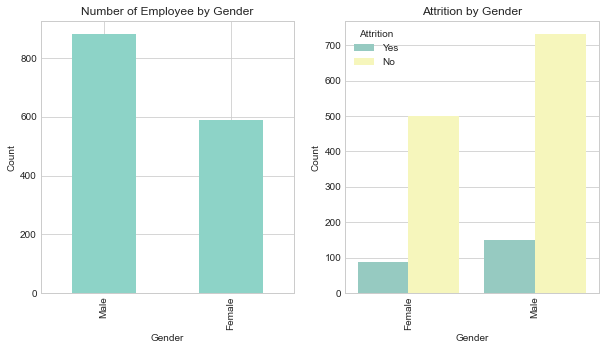

In [11]:
categorical_column_viz('Gender')
plt.savefig('images/Attrition by Gender')

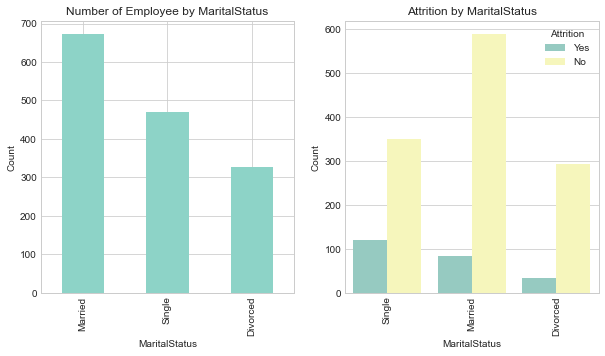

In [12]:
categorical_column_viz('MaritalStatus')
plt.savefig('images/Attrition by Marital Status')

In [13]:
categorical_column_viz('JobRole')
plt.savefig('images/Attrition by Job Role')

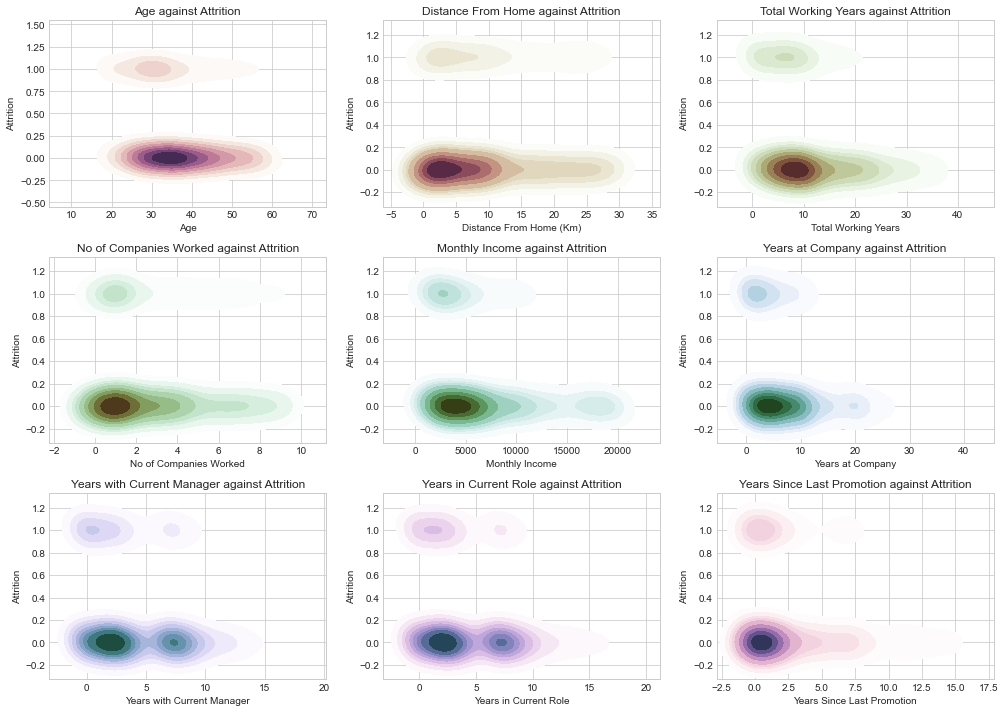

In [14]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )

f, axes = plt.subplots(3, 3, figsize=(14, 10), sharex=False, sharey=False)

# Define colormap scheme
s = np.linspace(0, 5, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
# Generate and plot
x = data['Age'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Attrition')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['DistanceFromHome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Distance From Home against Attrition')
axes[0,1].set_xlabel('Distance From Home (Km)')
axes[0,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['TotalWorkingYears'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Total Working Years against Attrition')
axes[0,2].set_xlabel('Total Working Years')
axes[0,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = data['NumCompaniesWorked'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'No of Companies Worked against Attrition')
axes[1,0].set_xlabel('No of Companies Worked')
axes[1,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['MonthlyIncome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Monthly Income against Attrition')
axes[1,1].set_xlabel('Monthly Income')
axes[1,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['YearsAtCompany'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Years at Company against Attrition')
axes[1,2].set_xlabel('Years at Company')
axes[1,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = data['YearsWithCurrManager'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years with Current Manager against Attrition')
axes[2,0].set_xlabel('Years with Current Manager')
axes[2,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['YearsInCurrentRole'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Years in Current Role against Attrition')
axes[2,1].set_xlabel('Years in Current Role')
axes[2,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['YearsSinceLastPromotion'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'Years Since Last Promotion against Attrition')
axes[2,2].set_xlabel('Years Since Last Promotion')
axes[2,2].set_ylabel('Attrition')

f.tight_layout()
plt.savefig('images/Features Against Attrition')

In [15]:
# Visualization of numerical features

attrition = data[data['Attrition'] == 1]
no_attrition = data[data['Attrition'] == 0]

In [16]:
# Data visualization
# Demographic-related features
# Gender, MaritalStatus, JobRole

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count Plot
    data[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[0].set_title(f'Employee Rating on {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 0)
 
    # Attrition Count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by Rating on {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels()) 

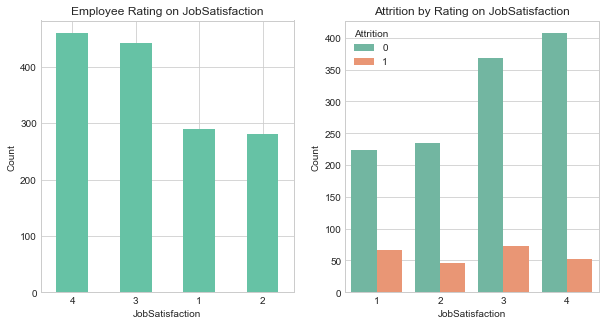

In [17]:
categorical_column_viz('JobSatisfaction')
plt.savefig('images/Attrition by Rating on JobS atisfaction')

In [18]:
categorical_column_viz('EnvironmentSatisfaction')
plt.savefig('images/Attrition by Rating on Environment Satisfaction')

In [19]:
categorical_column_viz('RelationshipSatisfaction')
plt.savefig('images/Attrition by Rating on Relationship Satisfaction')

In [20]:
categorical_column_viz('WorkLifeBalance')
plt.savefig('images/Attrition by Rating on Work-Life Balance')

In [23]:
#Feature engineering
#Label encoding categorial data

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','Gender','MaritalStatus','JobRole']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)
data.to_csv('CleanedData.csv')

In [23]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

(1470, 16)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.20,random_state=42)

In [25]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1176, 16), Test Data Shape (294, 16)


In [26]:
print(f"Train data shape: {y_train.shape}, Test Data Shape {y_test.shape}")

Train data shape: (1176,), Test Data Shape (294,)


In [27]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [26]:
# Logistic Regression

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
print("Train Accuracy: %s" % acc_log)
print("Test Accuracy: %s" % acc_cv_log)

Train Accuracy: 83.84
Test Accuracy: 83.84


In [27]:
# SVM

train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Accuracy: 83.16
Accuracy CV 10-Fold: 83.16


In [28]:
# Linear SVC

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 83.33
Accuracy CV 10-Fold: 76.7


In [29]:
# K Nearest Neighbour

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 85.97
Accuracy CV 10-Fold: 79.34


In [30]:
# Gaussian Naive Bayes

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 79.34
Accuracy CV 10-Fold: 78.83


In [31]:
# Perceptron

train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)

Accuracy: 16.84
Accuracy CV 10-Fold: 76.53


In [32]:
# Stochastic Gradient Descent

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 83.16
Accuracy CV 10-Fold: 82.99


In [33]:
# Decision Tree

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 100.0
Accuracy CV 10-Fold: 75.0


In [34]:
# Gradient Boosting Trees

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 91.84
Accuracy CV 10-Fold: 84.52


In [35]:
# Random Forest

train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)

Accuracy: 100.0
Accuracy CV 10-Fold: 84.1


In [36]:
# Neural Network

train_pred_nn, acc_nn, acc_cv_nn = fit_ml_algo(MLPClassifier(max_iter=1500),X_train, y_train,10)
print("Accuracy: %s" % acc_nn)
print("Accuracy CV 10-Fold: %s" % acc_cv_nn)

Accuracy: 16.92
Accuracy CV 10-Fold: 75.34


In [28]:
# CatBoost Classifier
# Define the categorical features for the CatBoost model

cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [29]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)  

In [30]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.011041
0:	learn: 0.6868296	total: 194ms	remaining: 3m 13s
1:	learn: 0.6809083	total: 251ms	remaining: 2m 5s
2:	learn: 0.6752429	total: 276ms	remaining: 1m 31s
3:	learn: 0.6694977	total: 287ms	remaining: 1m 11s
4:	learn: 0.6642421	total: 291ms	remaining: 58s
5:	learn: 0.6589755	total: 317ms	remaining: 52.6s
6:	learn: 0.6532520	total: 354ms	remaining: 50.2s
7:	learn: 0.6476106	total: 370ms	remaining: 45.9s
8:	learn: 0.6428499	total: 380ms	remaining: 41.9s
9:	learn: 0.6382176	total: 385ms	remaining: 38.1s
10:	learn: 0.6336982	total: 392ms	remaining: 35.2s
11:	learn: 0.6271810	total: 427ms	remaining: 35.2s
12:	learn: 0.6228661	total: 440ms	remaining: 33.4s
13:	learn: 0.6186903	total: 445ms	remaining: 31.3s
14:	learn: 0.6139004	total: 471ms	remaining: 30.9s
15:	learn: 0.6095561	total: 509ms	remaining: 31.3s
16:	learn: 0.6056883	total: 516ms	remaining: 29.8s
17:	learn: 0.6003071	total: 557ms	remaining: 30.4s
18:	learn: 0.5966331	total: 569ms	remaining: 29.4s
19:	learn:

163:	learn: 0.3806136	total: 6.36s	remaining: 32.4s
164:	learn: 0.3802359	total: 6.4s	remaining: 32.4s
165:	learn: 0.3792924	total: 6.46s	remaining: 32.5s
166:	learn: 0.3787592	total: 6.52s	remaining: 32.5s
167:	learn: 0.3782252	total: 6.56s	remaining: 32.5s
168:	learn: 0.3778799	total: 6.62s	remaining: 32.6s
169:	learn: 0.3770775	total: 6.68s	remaining: 32.6s
170:	learn: 0.3764052	total: 6.77s	remaining: 32.8s
171:	learn: 0.3760350	total: 6.89s	remaining: 33.2s
172:	learn: 0.3754937	total: 6.95s	remaining: 33.2s
173:	learn: 0.3745954	total: 7.02s	remaining: 33.3s
174:	learn: 0.3736511	total: 7.07s	remaining: 33.3s
175:	learn: 0.3732388	total: 7.14s	remaining: 33.4s
176:	learn: 0.3729153	total: 7.2s	remaining: 33.5s
177:	learn: 0.3722121	total: 7.25s	remaining: 33.5s
178:	learn: 0.3717087	total: 7.29s	remaining: 33.4s
179:	learn: 0.3710134	total: 7.34s	remaining: 33.4s
180:	learn: 0.3704725	total: 7.38s	remaining: 33.4s
181:	learn: 0.3701053	total: 7.44s	remaining: 33.4s
182:	learn: 0.

324:	learn: 0.3173204	total: 14.3s	remaining: 29.7s
325:	learn: 0.3172277	total: 14.3s	remaining: 29.6s
326:	learn: 0.3172160	total: 14.3s	remaining: 29.5s
327:	learn: 0.3166861	total: 14.4s	remaining: 29.5s
328:	learn: 0.3164839	total: 14.4s	remaining: 29.4s
329:	learn: 0.3161248	total: 14.5s	remaining: 29.4s
330:	learn: 0.3159222	total: 14.5s	remaining: 29.3s
331:	learn: 0.3159007	total: 14.5s	remaining: 29.2s
332:	learn: 0.3153866	total: 14.5s	remaining: 29.1s
333:	learn: 0.3150676	total: 14.6s	remaining: 29.1s
334:	learn: 0.3146951	total: 14.6s	remaining: 29s
335:	learn: 0.3142861	total: 14.7s	remaining: 29s
336:	learn: 0.3139760	total: 14.7s	remaining: 28.9s
337:	learn: 0.3137715	total: 14.7s	remaining: 28.9s
338:	learn: 0.3134574	total: 14.8s	remaining: 28.8s
339:	learn: 0.3130702	total: 14.8s	remaining: 28.7s
340:	learn: 0.3126461	total: 14.8s	remaining: 28.7s
341:	learn: 0.3124158	total: 14.9s	remaining: 28.6s
342:	learn: 0.3120550	total: 14.9s	remaining: 28.6s
343:	learn: 0.31

484:	learn: 0.2795672	total: 20.2s	remaining: 21.4s
485:	learn: 0.2792492	total: 20.2s	remaining: 21.4s
486:	learn: 0.2791466	total: 20.3s	remaining: 21.4s
487:	learn: 0.2787527	total: 20.3s	remaining: 21.3s
488:	learn: 0.2786510	total: 20.4s	remaining: 21.3s
489:	learn: 0.2782851	total: 20.4s	remaining: 21.3s
490:	learn: 0.2780519	total: 20.5s	remaining: 21.2s
491:	learn: 0.2777212	total: 20.5s	remaining: 21.2s
492:	learn: 0.2777172	total: 20.5s	remaining: 21.1s
493:	learn: 0.2773843	total: 20.6s	remaining: 21s
494:	learn: 0.2770878	total: 20.6s	remaining: 21s
495:	learn: 0.2768916	total: 20.6s	remaining: 20.9s
496:	learn: 0.2766008	total: 20.7s	remaining: 20.9s
497:	learn: 0.2763375	total: 20.7s	remaining: 20.9s
498:	learn: 0.2761356	total: 20.7s	remaining: 20.8s
499:	learn: 0.2761067	total: 20.7s	remaining: 20.7s
500:	learn: 0.2760552	total: 20.8s	remaining: 20.7s
501:	learn: 0.2757967	total: 20.8s	remaining: 20.6s
502:	learn: 0.2757247	total: 20.8s	remaining: 20.6s
503:	learn: 0.27

647:	learn: 0.2516361	total: 26.1s	remaining: 14.2s
648:	learn: 0.2514227	total: 26.1s	remaining: 14.1s
649:	learn: 0.2511615	total: 26.2s	remaining: 14.1s
650:	learn: 0.2508629	total: 26.2s	remaining: 14s
651:	learn: 0.2508004	total: 26.2s	remaining: 14s
652:	learn: 0.2507066	total: 26.3s	remaining: 14s
653:	learn: 0.2505864	total: 26.3s	remaining: 13.9s
654:	learn: 0.2505856	total: 26.3s	remaining: 13.9s
655:	learn: 0.2505363	total: 26.3s	remaining: 13.8s
656:	learn: 0.2503869	total: 26.4s	remaining: 13.8s
657:	learn: 0.2503283	total: 26.4s	remaining: 13.7s
658:	learn: 0.2502489	total: 26.4s	remaining: 13.7s
659:	learn: 0.2498475	total: 26.5s	remaining: 13.6s
660:	learn: 0.2497862	total: 26.5s	remaining: 13.6s
661:	learn: 0.2496825	total: 26.6s	remaining: 13.6s
662:	learn: 0.2494564	total: 26.6s	remaining: 13.5s
663:	learn: 0.2492403	total: 26.7s	remaining: 13.5s
664:	learn: 0.2489950	total: 26.7s	remaining: 13.5s
665:	learn: 0.2489420	total: 26.8s	remaining: 13.4s
666:	learn: 0.2486

810:	learn: 0.2311432	total: 32.7s	remaining: 7.61s
811:	learn: 0.2307845	total: 32.7s	remaining: 7.57s
812:	learn: 0.2306185	total: 32.7s	remaining: 7.53s
813:	learn: 0.2304709	total: 32.8s	remaining: 7.49s
814:	learn: 0.2302876	total: 32.8s	remaining: 7.44s
815:	learn: 0.2300472	total: 32.8s	remaining: 7.4s
816:	learn: 0.2299168	total: 32.9s	remaining: 7.36s
817:	learn: 0.2298035	total: 32.9s	remaining: 7.32s
818:	learn: 0.2296637	total: 32.9s	remaining: 7.28s
819:	learn: 0.2295039	total: 33s	remaining: 7.24s
820:	learn: 0.2294494	total: 33s	remaining: 7.2s
821:	learn: 0.2293376	total: 33s	remaining: 7.16s
822:	learn: 0.2293062	total: 33.1s	remaining: 7.12s
823:	learn: 0.2291487	total: 33.1s	remaining: 7.07s
824:	learn: 0.2290305	total: 33.2s	remaining: 7.03s
825:	learn: 0.2286027	total: 33.2s	remaining: 6.99s
826:	learn: 0.2283101	total: 33.2s	remaining: 6.95s
827:	learn: 0.2281005	total: 33.3s	remaining: 6.91s
828:	learn: 0.2280160	total: 33.3s	remaining: 6.87s
829:	learn: 0.227910

972:	learn: 0.2099284	total: 39.8s	remaining: 1.1s
973:	learn: 0.2097770	total: 39.8s	remaining: 1.06s
974:	learn: 0.2097571	total: 39.9s	remaining: 1.02s
975:	learn: 0.2096810	total: 39.9s	remaining: 981ms
976:	learn: 0.2096378	total: 39.9s	remaining: 940ms
977:	learn: 0.2095119	total: 40s	remaining: 899ms
978:	learn: 0.2093092	total: 40s	remaining: 858ms
979:	learn: 0.2091434	total: 40.1s	remaining: 817ms
980:	learn: 0.2091115	total: 40.1s	remaining: 777ms
981:	learn: 0.2091012	total: 40.2s	remaining: 736ms
982:	learn: 0.2090224	total: 40.2s	remaining: 695ms
983:	learn: 0.2089087	total: 40.3s	remaining: 655ms
984:	learn: 0.2088345	total: 40.3s	remaining: 614ms
985:	learn: 0.2086985	total: 40.4s	remaining: 573ms
986:	learn: 0.2085504	total: 40.4s	remaining: 532ms
987:	learn: 0.2085175	total: 40.4s	remaining: 491ms
988:	learn: 0.2084774	total: 40.5s	remaining: 450ms
989:	learn: 0.2082487	total: 40.5s	remaining: 409ms
990:	learn: 0.2081857	total: 40.6s	remaining: 368ms
991:	learn: 0.208

In [31]:
# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)


# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6758624	test: 0.6763810	best: 0.6763810 (0)
1:	learn: 0.6588012	test: 0.6590623	best: 0.6590623 (1)
2:	learn: 0.6437514	test: 0.6444297	best: 0.6444297 (2)
3:	learn: 0.6291355	test: 0.6302621	best: 0.6302621 (3)
4:	learn: 0.6158939	test: 0.6169449	best: 0.6169449 (4)
5:	learn: 0.6032980	test: 0.6046077	best: 0.6046077 (5)
6:	learn: 0.5924215	test: 0.5937437	best: 0.5937437 (6)
7:	learn: 0.5806459	test: 0.5822360	best: 0.5822360 (7)
8:	learn: 0.5701042	test: 0.5720628	best: 0.5720628 (8)
9:	learn: 0.5606673	test: 0.5629929	best: 0.5629929 (9)
10:	learn: 0.5512803	test: 0.5545155	best: 0.5545155 (10)
11:	learn: 0.5429651	test: 0.5462204	best: 0.5462204 (11)
12:	learn: 0.5350014	test: 0.5383432	best: 0.5383432 (12)	total: 5.04s	remaining: 6m 22s
13:	learn: 0.5271454	test: 0.5309574	best: 0.5309574 (13)
14:	learn: 0.5200510	test: 0.5239584	best: 0.5239584 (14)
15:	learn: 0.5135365	test: 0.5177550	best: 0.5177550 (15)
16:	learn: 0.5069328	test: 0.5115863	best: 0.5115863 (16)
17:

146:	learn: 0.2986414	test: 0.3894433	best: 0.3894433 (146)
147:	learn: 0.2980931	test: 0.3893948	best: 0.3893948 (147)
148:	learn: 0.2975233	test: 0.3891967	best: 0.3891967 (148)
149:	learn: 0.2968745	test: 0.3890142	best: 0.3890142 (149)
150:	learn: 0.2962620	test: 0.3890143	best: 0.3890142 (149)
151:	learn: 0.2955431	test: 0.3889504	best: 0.3889504 (151)
152:	learn: 0.2946187	test: 0.3888122	best: 0.3888122 (152)
153:	learn: 0.2938716	test: 0.3886229	best: 0.3886229 (153)
154:	learn: 0.2933087	test: 0.3885958	best: 0.3885958 (154)
155:	learn: 0.2925877	test: 0.3884156	best: 0.3884156 (155)
156:	learn: 0.2921841	test: 0.3883302	best: 0.3883302 (156)
157:	learn: 0.2915355	test: 0.3882820	best: 0.3882820 (157)
158:	learn: 0.2908782	test: 0.3880285	best: 0.3880285 (158)
159:	learn: 0.2900485	test: 0.3880187	best: 0.3880187 (159)	total: 1m 11s	remaining: 6m 14s
160:	learn: 0.2895261	test: 0.3879868	best: 0.3879868 (160)
161:	learn: 0.2888595	test: 0.3878447	best: 0.3878447 (161)
162:	lea

296:	learn: 0.2228276	test: 0.3830645	best: 0.3828273 (271)
297:	learn: 0.2223311	test: 0.3831859	best: 0.3828273 (271)
298:	learn: 0.2218804	test: 0.3831513	best: 0.3828273 (271)
299:	learn: 0.2215878	test: 0.3830401	best: 0.3828273 (271)
300:	learn: 0.2212272	test: 0.3831224	best: 0.3828273 (271)
301:	learn: 0.2208949	test: 0.3831904	best: 0.3828273 (271)
302:	learn: 0.2205806	test: 0.3831714	best: 0.3828273 (271)
303:	learn: 0.2202828	test: 0.3832769	best: 0.3828273 (271)
304:	learn: 0.2198081	test: 0.3833233	best: 0.3828273 (271)
305:	learn: 0.2194546	test: 0.3832667	best: 0.3828273 (271)
306:	learn: 0.2191677	test: 0.3833447	best: 0.3828273 (271)
307:	learn: 0.2189270	test: 0.3833011	best: 0.3828273 (271)
308:	learn: 0.2184855	test: 0.3832210	best: 0.3828273 (271)
309:	learn: 0.2181878	test: 0.3833266	best: 0.3828273 (271)
310:	learn: 0.2176872	test: 0.3834925	best: 0.3828273 (271)
311:	learn: 0.2172509	test: 0.3835239	best: 0.3828273 (271)	total: 2m 18s	remaining: 5m 4s
312:	lear

436:	learn: 0.1777832	test: 0.3855184	best: 0.3828273 (271)
437:	learn: 0.1775990	test: 0.3855871	best: 0.3828273 (271)
438:	learn: 0.1773313	test: 0.3857463	best: 0.3828273 (271)
439:	learn: 0.1770679	test: 0.3855796	best: 0.3828273 (271)
440:	learn: 0.1768021	test: 0.3856384	best: 0.3828273 (271)
441:	learn: 0.1764802	test: 0.3857888	best: 0.3828273 (271)
442:	learn: 0.1762807	test: 0.3858600	best: 0.3828273 (271)
443:	learn: 0.1759249	test: 0.3857782	best: 0.3828273 (271)
444:	learn: 0.1756248	test: 0.3857956	best: 0.3828273 (271)
445:	learn: 0.1753909	test: 0.3857361	best: 0.3828273 (271)
446:	learn: 0.1749747	test: 0.3859022	best: 0.3828273 (271)	total: 3m 22s	remaining: 4m 10s
447:	learn: 0.1746915	test: 0.3859200	best: 0.3828273 (271)
448:	learn: 0.1744246	test: 0.3860355	best: 0.3828273 (271)
449:	learn: 0.1741405	test: 0.3859923	best: 0.3828273 (271)
450:	learn: 0.1736828	test: 0.3859121	best: 0.3828273 (271)
451:	learn: 0.1734441	test: 0.3858157	best: 0.3828273 (271)
452:	lea

569:	learn: 0.1449694	test: 0.3879029	best: 0.3828273 (271)
570:	learn: 0.1448055	test: 0.3879779	best: 0.3828273 (271)
571:	learn: 0.1446079	test: 0.3879966	best: 0.3828273 (271)
572:	learn: 0.1443837	test: 0.3880107	best: 0.3828273 (271)
573:	learn: 0.1441459	test: 0.3880996	best: 0.3828273 (271)
574:	learn: 0.1439548	test: 0.3880661	best: 0.3828273 (271)
575:	learn: 0.1437622	test: 0.3881378	best: 0.3828273 (271)
576:	learn: 0.1435230	test: 0.3880367	best: 0.3828273 (271)
577:	learn: 0.1433233	test: 0.3880350	best: 0.3828273 (271)
578:	learn: 0.1430567	test: 0.3881304	best: 0.3828273 (271)
579:	learn: 0.1428638	test: 0.3879734	best: 0.3828273 (271)
580:	learn: 0.1426273	test: 0.3879702	best: 0.3828273 (271)
581:	learn: 0.1424427	test: 0.3880519	best: 0.3828273 (271)
582:	learn: 0.1422806	test: 0.3880898	best: 0.3828273 (271)
583:	learn: 0.1420483	test: 0.3881656	best: 0.3828273 (271)
584:	learn: 0.1418171	test: 0.3882292	best: 0.3828273 (271)	total: 4m 31s	remaining: 3m 12s
585:	lea

703:	learn: 0.1191790	test: 0.3914291	best: 0.3828273 (271)
704:	learn: 0.1190179	test: 0.3913555	best: 0.3828273 (271)
705:	learn: 0.1188617	test: 0.3914045	best: 0.3828273 (271)
706:	learn: 0.1187246	test: 0.3914165	best: 0.3828273 (271)
707:	learn: 0.1185778	test: 0.3913897	best: 0.3828273 (271)
708:	learn: 0.1184194	test: 0.3914229	best: 0.3828273 (271)
709:	learn: 0.1182505	test: 0.3913712	best: 0.3828273 (271)
710:	learn: 0.1181377	test: 0.3913786	best: 0.3828273 (271)
711:	learn: 0.1179841	test: 0.3912735	best: 0.3828273 (271)
712:	learn: 0.1178256	test: 0.3913227	best: 0.3828273 (271)
713:	learn: 0.1176960	test: 0.3914179	best: 0.3828273 (271)
714:	learn: 0.1175452	test: 0.3913771	best: 0.3828273 (271)
715:	learn: 0.1173146	test: 0.3913188	best: 0.3828273 (271)	total: 5m 35s	remaining: 2m 12s
716:	learn: 0.1172275	test: 0.3912848	best: 0.3828273 (271)
717:	learn: 0.1170657	test: 0.3912307	best: 0.3828273 (271)
718:	learn: 0.1169415	test: 0.3913261	best: 0.3828273 (271)
719:	lea

839:	learn: 0.0991078	test: 0.3960269	best: 0.3828273 (271)
840:	learn: 0.0990050	test: 0.3959348	best: 0.3828273 (271)
841:	learn: 0.0988538	test: 0.3959622	best: 0.3828273 (271)
842:	learn: 0.0987459	test: 0.3960068	best: 0.3828273 (271)
843:	learn: 0.0986027	test: 0.3960267	best: 0.3828273 (271)
844:	learn: 0.0984805	test: 0.3959715	best: 0.3828273 (271)
845:	learn: 0.0983588	test: 0.3959697	best: 0.3828273 (271)
846:	learn: 0.0982330	test: 0.3959270	best: 0.3828273 (271)
847:	learn: 0.0980881	test: 0.3959191	best: 0.3828273 (271)
848:	learn: 0.0979568	test: 0.3958056	best: 0.3828273 (271)
849:	learn: 0.0978269	test: 0.3957831	best: 0.3828273 (271)
850:	learn: 0.0977175	test: 0.3956690	best: 0.3828273 (271)
851:	learn: 0.0975903	test: 0.3956999	best: 0.3828273 (271)
852:	learn: 0.0974601	test: 0.3957984	best: 0.3828273 (271)	total: 6m 42s	remaining: 1m 9s
853:	learn: 0.0972902	test: 0.3957743	best: 0.3828273 (271)
854:	learn: 0.0971506	test: 0.3957526	best: 0.3828273 (271)
855:	lear

971:	learn: 0.0843405	test: 0.3986532	best: 0.3828273 (271)
972:	learn: 0.0842829	test: 0.3986762	best: 0.3828273 (271)
973:	learn: 0.0841725	test: 0.3987386	best: 0.3828273 (271)
974:	learn: 0.0840733	test: 0.3988013	best: 0.3828273 (271)
975:	learn: 0.0839336	test: 0.3989090	best: 0.3828273 (271)
976:	learn: 0.0838377	test: 0.3990137	best: 0.3828273 (271)
977:	learn: 0.0837435	test: 0.3990120	best: 0.3828273 (271)
978:	learn: 0.0836814	test: 0.3990290	best: 0.3828273 (271)
979:	learn: 0.0835547	test: 0.3991233	best: 0.3828273 (271)
980:	learn: 0.0834779	test: 0.3990473	best: 0.3828273 (271)
981:	learn: 0.0833701	test: 0.3990912	best: 0.3828273 (271)
982:	learn: 0.0832102	test: 0.3991786	best: 0.3828273 (271)
983:	learn: 0.0831491	test: 0.3991845	best: 0.3828273 (271)
984:	learn: 0.0830487	test: 0.3992849	best: 0.3828273 (271)
985:	learn: 0.0829519	test: 0.3994079	best: 0.3828273 (271)
986:	learn: 0.0828644	test: 0.3994789	best: 0.3828273 (271)	total: 7m 47s	remaining: 6.15s
987:	lear

In [41]:
# LGBM Classifier

from lightgbm import LGBMClassifier
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(learning_rate=0.03,n_estimators=1000),X_train, y_train,10)
print("Accuracy: %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)

Accuracy: 100.0
Accuracy CV 10-Fold: 82.57


In [42]:
# XGBoost

train_pred_xgb, acc_xgb, acc_cv_xgb = fit_ml_algo(xgb.XGBClassifier(random_state=29, n_jobs=-1),X_train, y_train,10)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)

[16:49:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 100.0
Accuracy CV 10-Fold: 82.31


In [43]:
Model = ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron','Stochastic Gradient Decent',
              'Decision Tree', 'Gradient Boosting Trees','Random Forest','Neural Network','CatBoost','LGBM Classifier',
              'XGBoost']
results = DataFrame({
    'Train Accuracy': [acc_log,acc_svc,acc_linear_svc,acc_knn,acc_gaussian,acc_perceptron,acc_sgd,acc_dt,acc_gbt,acc_rf,
        acc_nn,acc_catboost,acc_lgbm,acc_xgb],
    'Test Accuracy': [acc_cv_log,acc_cv_svc,acc_cv_linear_svc,acc_cv_knn,acc_cv_gaussian,acc_cv_perceptron,acc_cv_sgd,
                      acc_cv_dt,acc_cv_gbt,acc_cv_rf,acc_cv_nn,acc_cv_catboost,acc_cv_lgbm,acc_cv_xgb]
}, index = Model)
results.sort_values(by='Test Accuracy', ascending=False)

Train Accuracy  Test Accuracy
CatBoost                             87.07          84.70
Gradient Boosting Trees              91.84          84.52
Random Forest                       100.00          84.10
Logistic Regression                  83.84          83.84
SVM                                  83.16          83.16
Stochastic Gradient Decent           83.16          82.99
LGBM Classifier                     100.00          82.57
XGBoost                             100.00          82.31
KNN                                  85.97          79.34
Naive Bayes                          79.34          78.83
Linear SVC                           83.33          76.70
Perceptron                           16.84          76.53
Neural Network                       16.92          75.34
Decision Tree                       100.00          75.00

In [34]:
# Predict using CatBoost

model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss').fit(train_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.011041
0:	learn: 0.6868296	total: 29.3ms	remaining: 29.3s
1:	learn: 0.6809083	total: 65ms	remaining: 32.4s
2:	learn: 0.6752429	total: 82.5ms	remaining: 27.4s
3:	learn: 0.6694977	total: 91.9ms	remaining: 22.9s
4:	learn: 0.6642421	total: 97.6ms	remaining: 19.4s
5:	learn: 0.6589755	total: 119ms	remaining: 19.7s
6:	learn: 0.6532520	total: 151ms	remaining: 21.4s
7:	learn: 0.6476106	total: 166ms	remaining: 20.6s
8:	learn: 0.6428499	total: 175ms	remaining: 19.2s
9:	learn: 0.6382176	total: 181ms	remaining: 17.9s
10:	learn: 0.6336982	total: 186ms	remaining: 16.8s
11:	learn: 0.6271810	total: 222ms	remaining: 18.2s
12:	learn: 0.6228661	total: 232ms	remaining: 17.6s
13:	learn: 0.6186903	total: 237ms	remaining: 16.7s
14:	learn: 0.6139004	total: 262ms	remaining: 17.2s
15:	learn: 0.6095561	total: 295ms	remaining: 18.1s
16:	learn: 0.6056883	total: 301ms	remaining: 17.4s
17:	learn: 0.6003071	total: 334ms	remaining: 18.2s
18:	learn: 0.5966331	total: 343ms	remaining: 17.7s
19:	lear

162:	learn: 0.3813312	total: 5.13s	remaining: 26.3s
163:	learn: 0.3806136	total: 5.18s	remaining: 26.4s
164:	learn: 0.3802359	total: 5.22s	remaining: 26.4s
165:	learn: 0.3792924	total: 5.26s	remaining: 26.4s
166:	learn: 0.3787592	total: 5.3s	remaining: 26.4s
167:	learn: 0.3782252	total: 5.33s	remaining: 26.4s
168:	learn: 0.3778799	total: 5.39s	remaining: 26.5s
169:	learn: 0.3770775	total: 5.42s	remaining: 26.5s
170:	learn: 0.3764052	total: 5.45s	remaining: 26.4s
171:	learn: 0.3760350	total: 5.48s	remaining: 26.4s
172:	learn: 0.3754937	total: 5.51s	remaining: 26.4s
173:	learn: 0.3745954	total: 5.55s	remaining: 26.3s
174:	learn: 0.3736511	total: 5.58s	remaining: 26.3s
175:	learn: 0.3732388	total: 5.62s	remaining: 26.3s
176:	learn: 0.3729153	total: 5.67s	remaining: 26.4s
177:	learn: 0.3722121	total: 5.72s	remaining: 26.4s
178:	learn: 0.3717087	total: 5.76s	remaining: 26.4s
179:	learn: 0.3710134	total: 5.79s	remaining: 26.4s
180:	learn: 0.3704725	total: 5.83s	remaining: 26.4s
181:	learn: 0

324:	learn: 0.3173204	total: 11.8s	remaining: 24.4s
325:	learn: 0.3172277	total: 11.8s	remaining: 24.4s
326:	learn: 0.3172160	total: 11.8s	remaining: 24.3s
327:	learn: 0.3166861	total: 11.9s	remaining: 24.3s
328:	learn: 0.3164839	total: 11.9s	remaining: 24.3s
329:	learn: 0.3161248	total: 11.9s	remaining: 24.2s
330:	learn: 0.3159222	total: 12s	remaining: 24.2s
331:	learn: 0.3159007	total: 12s	remaining: 24.1s
332:	learn: 0.3153866	total: 12s	remaining: 24.1s
333:	learn: 0.3150676	total: 12.1s	remaining: 24s
334:	learn: 0.3146951	total: 12.1s	remaining: 24.1s
335:	learn: 0.3142861	total: 12.2s	remaining: 24s
336:	learn: 0.3139760	total: 12.2s	remaining: 24s
337:	learn: 0.3137715	total: 12.3s	remaining: 24s
338:	learn: 0.3134574	total: 12.3s	remaining: 24s
339:	learn: 0.3130702	total: 12.3s	remaining: 23.9s
340:	learn: 0.3126461	total: 12.4s	remaining: 23.9s
341:	learn: 0.3124158	total: 12.4s	remaining: 23.9s
342:	learn: 0.3120550	total: 12.4s	remaining: 23.8s
343:	learn: 0.3117401	total:

484:	learn: 0.2795672	total: 18.1s	remaining: 19.3s
485:	learn: 0.2792492	total: 18.2s	remaining: 19.2s
486:	learn: 0.2791466	total: 18.2s	remaining: 19.2s
487:	learn: 0.2787527	total: 18.3s	remaining: 19.2s
488:	learn: 0.2786510	total: 18.3s	remaining: 19.1s
489:	learn: 0.2782851	total: 18.3s	remaining: 19.1s
490:	learn: 0.2780519	total: 18.4s	remaining: 19.1s
491:	learn: 0.2777212	total: 18.4s	remaining: 19s
492:	learn: 0.2777172	total: 18.4s	remaining: 19s
493:	learn: 0.2773843	total: 18.5s	remaining: 18.9s
494:	learn: 0.2770878	total: 18.5s	remaining: 18.9s
495:	learn: 0.2768916	total: 18.6s	remaining: 18.9s
496:	learn: 0.2766008	total: 18.6s	remaining: 18.8s
497:	learn: 0.2763375	total: 18.6s	remaining: 18.8s
498:	learn: 0.2761356	total: 18.7s	remaining: 18.8s
499:	learn: 0.2761067	total: 18.7s	remaining: 18.7s
500:	learn: 0.2760552	total: 18.7s	remaining: 18.7s
501:	learn: 0.2757967	total: 18.8s	remaining: 18.6s
502:	learn: 0.2757247	total: 18.8s	remaining: 18.6s
503:	learn: 0.27

646:	learn: 0.2518989	total: 24.6s	remaining: 13.4s
647:	learn: 0.2516361	total: 24.6s	remaining: 13.4s
648:	learn: 0.2514227	total: 24.7s	remaining: 13.3s
649:	learn: 0.2511615	total: 24.7s	remaining: 13.3s
650:	learn: 0.2508629	total: 24.7s	remaining: 13.3s
651:	learn: 0.2508004	total: 24.8s	remaining: 13.2s
652:	learn: 0.2507066	total: 24.8s	remaining: 13.2s
653:	learn: 0.2505864	total: 24.8s	remaining: 13.1s
654:	learn: 0.2505856	total: 24.9s	remaining: 13.1s
655:	learn: 0.2505363	total: 24.9s	remaining: 13.1s
656:	learn: 0.2503869	total: 24.9s	remaining: 13s
657:	learn: 0.2503283	total: 25s	remaining: 13s
658:	learn: 0.2502489	total: 25s	remaining: 12.9s
659:	learn: 0.2498475	total: 25s	remaining: 12.9s
660:	learn: 0.2497862	total: 25.1s	remaining: 12.9s
661:	learn: 0.2496825	total: 25.1s	remaining: 12.8s
662:	learn: 0.2494564	total: 25.2s	remaining: 12.8s
663:	learn: 0.2492403	total: 25.2s	remaining: 12.8s
664:	learn: 0.2489950	total: 25.3s	remaining: 12.7s
665:	learn: 0.2489420	

805:	learn: 0.2317695	total: 31.1s	remaining: 7.49s
806:	learn: 0.2317267	total: 31.1s	remaining: 7.45s
807:	learn: 0.2315558	total: 31.2s	remaining: 7.41s
808:	learn: 0.2314472	total: 31.2s	remaining: 7.37s
809:	learn: 0.2313864	total: 31.3s	remaining: 7.34s
810:	learn: 0.2311432	total: 31.3s	remaining: 7.3s
811:	learn: 0.2307845	total: 31.4s	remaining: 7.26s
812:	learn: 0.2306185	total: 31.4s	remaining: 7.22s
813:	learn: 0.2304709	total: 31.5s	remaining: 7.19s
814:	learn: 0.2302876	total: 31.5s	remaining: 7.16s
815:	learn: 0.2300472	total: 31.6s	remaining: 7.12s
816:	learn: 0.2299168	total: 31.6s	remaining: 7.08s
817:	learn: 0.2298035	total: 31.7s	remaining: 7.04s
818:	learn: 0.2296637	total: 31.7s	remaining: 7.01s
819:	learn: 0.2295039	total: 31.8s	remaining: 6.97s
820:	learn: 0.2294494	total: 31.9s	remaining: 6.95s
821:	learn: 0.2293376	total: 31.9s	remaining: 6.91s
822:	learn: 0.2293062	total: 32s	remaining: 6.87s
823:	learn: 0.2291487	total: 32s	remaining: 6.84s
824:	learn: 0.229

968:	learn: 0.2103037	total: 39s	remaining: 1.25s
969:	learn: 0.2101003	total: 39.1s	remaining: 1.21s
970:	learn: 0.2100083	total: 39.1s	remaining: 1.17s
971:	learn: 0.2099976	total: 39.2s	remaining: 1.13s
972:	learn: 0.2099284	total: 39.3s	remaining: 1.09s
973:	learn: 0.2097770	total: 39.3s	remaining: 1.05s
974:	learn: 0.2097571	total: 39.3s	remaining: 1.01s
975:	learn: 0.2096810	total: 39.4s	remaining: 968ms
976:	learn: 0.2096378	total: 39.4s	remaining: 928ms
977:	learn: 0.2095119	total: 39.4s	remaining: 887ms
978:	learn: 0.2093092	total: 39.5s	remaining: 847ms
979:	learn: 0.2091434	total: 39.6s	remaining: 807ms
980:	learn: 0.2091115	total: 39.6s	remaining: 767ms
981:	learn: 0.2091012	total: 39.7s	remaining: 727ms
982:	learn: 0.2090224	total: 39.7s	remaining: 687ms
983:	learn: 0.2089087	total: 39.8s	remaining: 647ms
984:	learn: 0.2088345	total: 39.8s	remaining: 606ms
985:	learn: 0.2086985	total: 39.8s	remaining: 566ms
986:	learn: 0.2085504	total: 39.9s	remaining: 525ms
987:	learn: 0.

In [35]:
predictions = model.predict(X_test)
pred_data = pd.DataFrame(index=X_test.index)
pred_data['Attrition'] = predictions
pred_data.head()

Attrition
1041          0
184           0
1222          0
67            0
220           0

In [36]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, predictions))

Accuracy: 87.07
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



Text(0.5, 1.0, 'CatBoost')

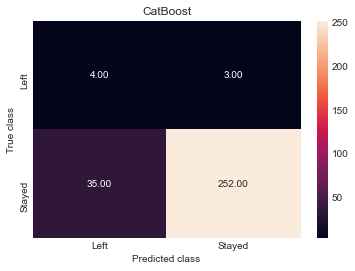

In [37]:
# Confusion matrix

cb_cm = metrics.confusion_matrix(predictions, y_test, [1,0])
sns.heatmap(cb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('CatBoost')

In [48]:
feature_labels = np.array(['Age', 'Gender', 'MaritalStatus', 'DistanceFromHome', 
      'TotalWorkingYears', 'NumCompaniesWorked', 'MonthlyIncome', 'JobRole', 'YearsAtCompany',
      'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction',
      'RelationshipSatisfaction', 'WorkLifeBalance'])
importance = model.get_feature_importance(type= "FeatureImportance")
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index])))

YearsAtCompany-3.64%
Gender-3.85%
WorkLifeBalance-4.03%
TotalWorkingYears-4.22%
YearsInCurrentRole-4.69%
YearsWithCurrManager-4.83%
YearsSinceLastPromotion-4.95%
RelationshipSatisfaction-4.95%
DistanceFromHome-6.35%
EnvironmentSatisfaction-7.20%
NumCompaniesWorked-7.56%
JobSatisfaction-7.81%
MaritalStatus-8.07%
JobRole-8.87%
Age-9.11%
MonthlyIncome-9.86%


In [26]:
# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=importance, y=feature_labels)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()
plt.savefig('images/chart')

NameError: name 'importance' is not defined

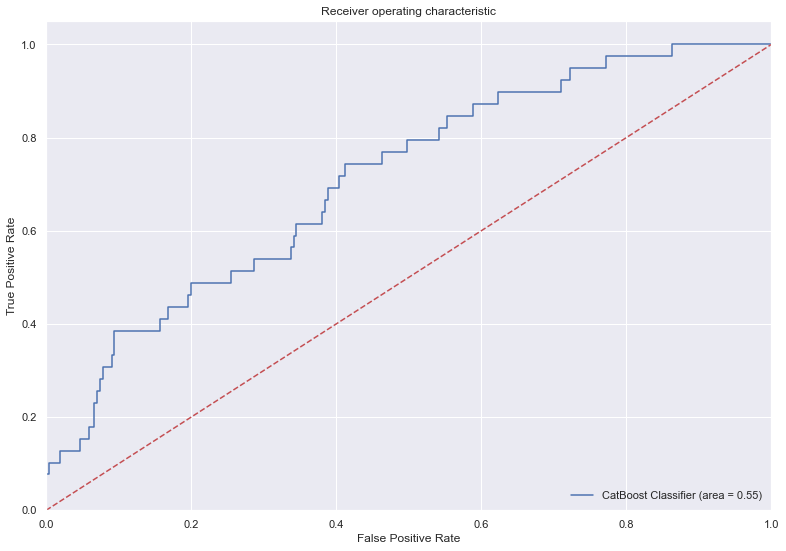

In [50]:
get_roc_curve = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoost Classifier (area = %0.2f)' % get_roc_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
import pickle
pickle.dump(model, open('test.pkl', 'wb'))